# Hồi quy tuyến tính.


### 1. Tập giả định

- Hồi quy tuyến tính là một mô hình **tuyến tính**, mô hình này giả định tồn tại một mối liên hệ tuyến tính giữa các biến đầu vào (x) và một biến đầu ra (y). Cụ thể hơn, y có thể được tính bằng một tổ hợp tuyến tính của các biến đầu vào (x).
- Một cách tổng quát, một mô hình tuyến tính dự đoán kết quả bằng cách tính tổng trọng số của các đặc trưng đầu vào (hay các biến độc lập). 
$$ \hat{y}=w_0+w_1x_1+w_2x_2+...+w_nx_n $$
    - $\hat{y}$ là giá trị dự đoán.
    - $n$ là số lượng đặc trưng.
    - $x_i$ là giá trị đặc trưng thứ $i$.
    - $w_j$ là tham số thứ $j$ của mô hình.
$$\hat{y}=h_{\mathbf{w}}\left(\mathbf{x}\right)=\mathbf{w}^{T}\cdot\mathbf{x}$$
    - $\mathbf{w}$ **vector trọng số** của mô hình (bao gốm cả $w_0$ và các trọng số đặc trưng $w_1,w_2,...w_n$).
    - $\mathbf{w}^T$ là chuyển vị của $\mathbf{w}$ (vector hàng thay vì vector cột).
    - $\mathbf{x}$ là **vector đầu vào** của các mẫu dữ liệu, *bao gồm* $x_0$ đến $x_n$, với $x_0$ *luôn có giá trị là* 1.
    - $\mathbf{w}^{T}\cdot\mathbf{x}$ là tích vô hướng của 2 vector $\mathbf{w}^T$ và $\mathbf{x}$.
    - $h_{\mathbf{w}}$ là hàm giả thiết, biểu diễn bằng các tham số $\mathbf{w}$.


### 2. Đánh giá hiệu suất và mục tiêu học

- Trước khi huấn luyện dữ liệu, ta cần phải đánh giá mô hình của chúng ta khớp với dữ liệu huấn luyện như thế nào. Cách đánh giá thường được sử dụng nhất là trung bình bình phương độ lỗi **MSE** (Mean Square Error) $\Rightarrow$ ta cần phải tìm $\mathbf{w}$ tối thiểu hóa MSE:
$$\mathbf{w}=\arg\min MSE_{\mathcal{D}_{train}}$$


- MSE trên tập huấn luyện $\mathcal{D}_{train}$ ký hiệu $\left(\mathbf{X},\mathbf{y}\right)$ bao gồm m mẫu $\left\{\left(\mathbf{x}_1,y_1\right),\left(\mathbf{x}_2,y_2\right),...\left(\mathbf{x}_m,y_m\right)\right\}$

$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\sum_{i=1}^{m}\left(\mathbf{w}^T\cdot\mathbf{x}_i - y_i\right )^2$$
$$MSE\left(X,h_{\mathbf{w}}\right)=\dfrac{1}{m}\Vert\mathbf{X}\mathbf{w}-\mathbf{y}\Vert^2$$

- Để tìm $\mathbf{w}$ sao cho hàm lỗi MSE tối thiểu ta tìm điểm đạo hàm của MSE có giá trị 0. 
$$\mathbf{\hat{w}}=\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}  \mathbf{X}^T  \mathbf{y}$$
  - $\mathbf{\hat{w}}$ là giá trị của $\mathbf{w}$ để giảm thiểu độ lỗi. 
  - **Chú ý** $\mathbf{X}^T  \mathbf{X}$ không phải luôn **khả nghịch**. $\left(\mathbf{X}^T  \mathbf{X}\right)^{\dagger}$ là nghịch đảo giả của $\left(\mathbf{X}^T  \mathbf{X}\right)$ - trường hợp nghịch đảo tổng quát kể cả khi ma trận không vuông cũng như không khả nghịch.

### 3. Cài đặt

#### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import sklearn.datasets as datasets
%matplotlib inline

#### Create data

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1, noise=5)

#### Load and visualize data

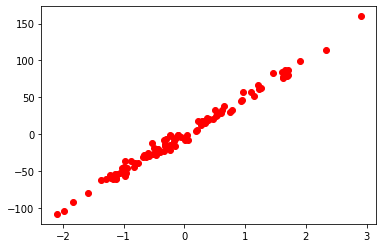

In [3]:
# Visualize data 

plt.plot(X, y, 'ro')
plt.show()


- Nhận xét dữ liệu: khi x tăng thì y tăng theo, dữ liệu gần như là một đường thẳng thể hiện x và y có mối quan hệ tuyến tính

#### Training function

In [4]:
def train_linear_regression(X, y):
    '''
    Trains Linear Regression on the dataset (X, y).
    
    Parameters
    ----------
    X : numpy array, shape (m, d + 1)
        The matrix of input vectors (each row corresponds to an input vector); 
        the first column of this matrix is all ones (corresponding to x_0).
    y : numpy array, shape (m, 1)
        The vector of outputs.
    
    Returns
    -------
    w : numpy array, shape (d + 1, 1)
        The vector of parameters of Linear Regression after training.
    '''
  
    temp = np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)
    w = np.dot(temp,y)    
    return w

In [5]:
# Construct one_added_X 
# First column of one_added_X is all ones (corresponding to x_0).
x_0 = np.ones((X.shape[0], 1))
one_added_X = np.concatenate((x_0, X), axis = 1)
print ('one_added_X.shape =', one_added_X.shape)
print ('y.shape =', y.shape)


one_added_X.shape = (100, 2)
y.shape = (100,)


#### Train our model and visualize result

(-2.3539359682946044, 3.158984522916441)

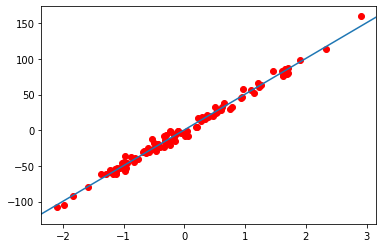

In [6]:
w = train_linear_regression(one_added_X, y)

# Visualize result
predicted_ys = one_added_X.dot(w)

plt.plot(X,y,'ro')

x_min, x_max = plt.xlim()
xs = np.array([x_min, x_max]).reshape(-1, 1)

# Construct one_added_xs 
# First column of one_added_xs is all ones (corresponding to x_0).
x_0 = np.ones((xs.shape[0], 1))
ones_added_xs = np.concatenate((x_0, xs), axis = 1)

predicted_ys = ones_added_xs.dot(w)
plt.plot(xs, predicted_ys)
plt.xlim(x_min, x_max)




**Điểm mạnh và điểm yếu của 'Hồi quy tuyến tính'**:

Điểm mạnh: dùng để phân tích mối quan hệ giữa hai biến (biến độc lập và biến mục tiêu), từ đó đưa ra kết quả dự đoán của biến mục tiêu

Điểm yếu: trong thực tế ta cần nhiều hơn hai biến để biểu diễn một mối quan hệ nào đó. Điều này làm cho hồi quy trở nên phức tạp và khó tính toán hơn.